## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [4]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0, 0.5, 'Scores')

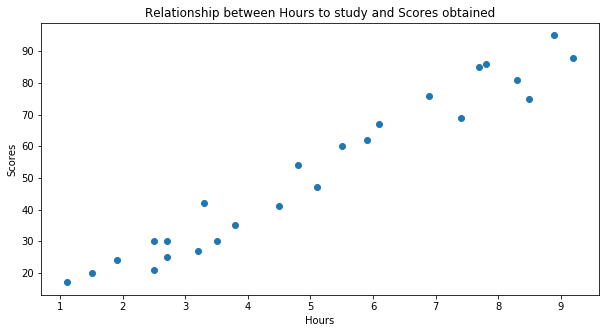

In [5]:
# Plotting the distribution of scores
plt.figure(figsize=(10,5))
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

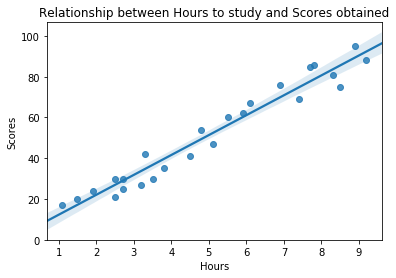

In [6]:
sb.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [7]:
x= data[['Hours']]
y=data[['Scores']]

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=101) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
from sklearn.linear_model import LinearRegression  
lg = LinearRegression()  
mk=lg.fit(x_train, y_train) 



Text(0, 0.5, 'Scores')

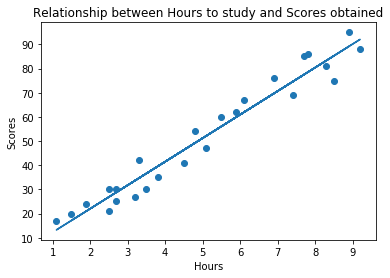

In [10]:
# Plotting the regression line
line = lg.coef_*x+lg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
h=lg.score(x_train,y_train)
print(h)
k=lg.score(x_test,y_test)
print(k)
f=lg.fit(x_test,y_test)

0.954930331163377
0.9377551740781869


In [12]:
hours = float(input("enter no of hours:" ))
marks = mk.predict([[hours]])

print(" Marks :",marks)



enter no of hours:6.5
 Marks : [[66.96684429]]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error,r2_score,max error,mean absolute error. There are many such metrics.

In [13]:
ypred=lg.predict(x_test)
from sklearn import metrics  
print('MAE: ',metrics.mean_absolute_error(y_test, ypred))
print('r2_score: ',metrics.r2_score(y_test, ypred))
print('MSE :',metrics.mean_squared_error(y_test, ypred))
print('ME :',metrics.max_error(y_test, ypred))

MAE:  4.7947898164594465
r2_score:  0.9402733628847035
MSE : 25.596447602131466
ME : 6.940201302545887
